# PREDICTING EMPLOYEE BURNOUT 

In [1]:
### importing libraries 
import numpy as np
import pandas as pd

In [2]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# Importing Data

In [4]:
Train_Data=pd.read_csv('train.csv')

In [5]:
Test_Data=pd.read_csv('Test.csv')

In [6]:
Sample_Data=pd.read_csv('sample_submission.csv')

##  EXPLORATION AND VALIDATION

In [7]:
print (Train_Data.shape)
Train_Data.head(10)

(22750, 9)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3.0,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2.0,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3.0,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3.0,6.0,NaN,0.67


In [8]:
Test_Data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7


In [9]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [10]:
Train_Data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [11]:
### BURN RATE V/S GENDER 
Train_Data[['Gender', 'Burn Rate']].groupby('Gender').agg('mean')


,Burn Rate
Gender,
Female,0.422788
Male,0.484271


<AxesSubplot:title={'center':'Burn Rate'}, xlabel='Gender'>

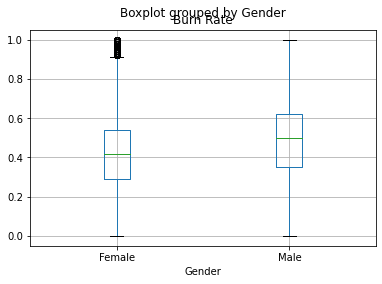

In [12]:
Train_Data.boxplot(column=['Burn Rate'], by='Gender')


In [13]:
### thus gender affects burn rate but not much 

In [14]:
### BURN RATE V/S WFH AVAILABILITY
Train_Data[['WFH Setup Available', 'Burn Rate']].groupby('WFH Setup Available').agg('mean')

,Burn Rate
WFH Setup Available,
No,0.517824
Yes,0.396010


<AxesSubplot:title={'center':'Burn Rate'}, xlabel='WFH Setup Available'>

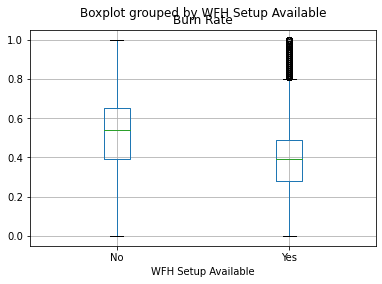

In [15]:
### high corr between wfh setub availability and burn rate 
Train_Data.boxplot(column=['Burn Rate'],by='WFH Setup Available')

In [16]:
### BURN RATE V/S COMPANY TYPE 
Train_Data[['Company Type', 'Burn Rate']].groupby('Company Type').agg('mean')

,Burn Rate
Company Type,
Product,0.450841
Service,0.452624


In [17]:
### company type does not really affect burn rate 

In [18]:
### BURN RATE V/S DESIGNATION 
Train_Data[['Designation','Burn Rate']].groupby('Designation').agg('mean')
### relation is almost linear 

,Burn Rate
Designation,
0.0,0.151015
1.0,0.308133
2.0,0.435472
3.0,0.545460
4.0,0.686690
5.0,0.856995


<AxesSubplot:title={'center':'Burn Rate'}, xlabel='Designation'>

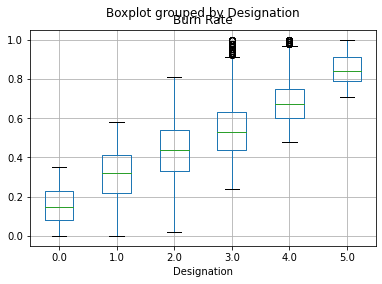

In [19]:
Train_Data.boxplot(column=['Burn Rate'], by='Designation')

In [20]:
### burn rate vs resource allocation i.e no of working hours 
Train_Data[['Resource Allocation','Burn Rate']].groupby('Resource Allocation').agg('mean')

,Burn Rate
Resource Allocation,
1.0,0.137572
2.0,0.253410
3.0,0.340330
4.0,0.418162
5.0,0.493428
6.0,0.576823
7.0,0.654707
8.0,0.736401
9.0,0.830911


<AxesSubplot:title={'center':'Burn Rate'}, xlabel='Resource Allocation'>

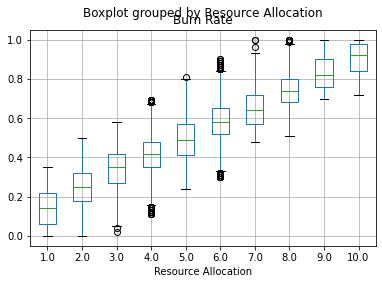

In [21]:
Train_Data.boxplot(column=['Burn Rate'], by='Resource Allocation')

In [22]:
### BURN RATE V/S MENTAL FATIGUE 
Train_Data[['Mental Fatigue Score','Burn Rate']].groupby('Mental Fatigue Score').agg('mean')

,Burn Rate
Mental Fatigue Score,
0.0,0.001341
0.1,0.011333
0.2,0.005455
0.3,0.020909
0.4,0.008750
...,...
9.6,0.865625
9.7,0.878378
9.8,0.893250


<AxesSubplot:title={'center':'Burn Rate'}, xlabel='Mental Fatigue Score'>

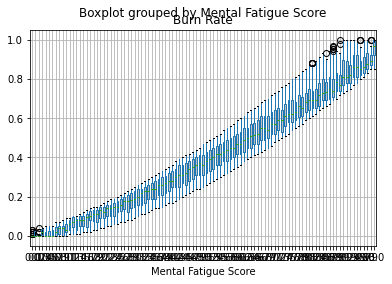

In [23]:
Train_Data.boxplot(column=['Burn Rate'], by='Mental Fatigue Score')

### CORRELATION  

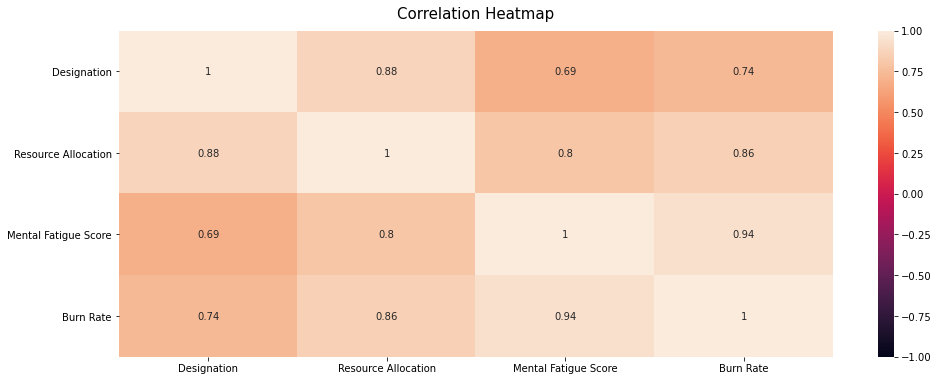

In [24]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Train_Data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);
plt.savefig("correlation_heatmap.png")

##   DATA CLEANING  

In [25]:
## remove burn rate null values by droping the entries
Train_Data.dropna(subset = ["Burn Rate",'Resource Allocation','Mental Fatigue Score'], inplace=True)
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  object 
 3   Company Type          18590 non-null  object 
 4   WFH Setup Available   18590 non-null  object 
 5   Designation           18590 non-null  float64
 6   Resource Allocation   18590 non-null  float64
 7   Mental Fatigue Score  18590 non-null  float64
 8   Burn Rate             18590 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


## DATA LABELLING 

In [26]:
def gender_encoder(data):
    if data["Gender"] == "Female":
        return 1
    return 0


def wfh_setup_encoder(data):
    if data["WFH Setup Available"] == "Yes":
        return 1
    return 0


def company_encoder(data):
    if data["Company Type"] == "Service":
        return 1
    return 0



Train_Data["Gender"] = Train_Data.apply(gender_encoder, axis=1)
Train_Data["WFH Setup Available"] = Train_Data.apply(wfh_setup_encoder, axis=1)
Train_Data["Company Type"] = Train_Data.apply(company_encoder, axis=1)

Test_Data["Gender"] = Test_Data.apply(gender_encoder, axis=1)
Test_Data["WFH Setup Available"] = Test_Data.apply(wfh_setup_encoder, axis=1)
Test_Data["Company Type"] = Test_Data.apply(company_encoder, axis=1)

In [27]:
Train_Data.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,1,1,0,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,0,1,1,1.0,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,0,1,1,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,1,1,0,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,0,0,1,2.0,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,1,1,0,3.0,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,1,1,1,2.0,4.0,4.4,0.33
10,fffe33003100330032003700,2008-03-16,0,0,1,2.0,3.0,5.3,0.50
11,fffe3400310035003800,2008-05-12,0,1,1,0.0,1.0,1.8,0.12
14,fffe33003100330036003300,2008-05-14,0,0,1,1.0,3.0,5.8,0.51


### CATEGORISING DATA 

In [28]:
### categorizing mental fatigue levels , designation and resource allocation 
def categorize_Mental_Fatigue(data):
    if data["Mental Fatigue Score"] <= 4.0:
        return 0
    if data["Mental Fatigue Score"] > 4.0 and data["Mental Fatigue Score"] <= 5.0:
        return 1
    if data["Mental Fatigue Score"] > 5.0 and data["Mental Fatigue Score"] <= 6.0:
        return 2
    if data["Mental Fatigue Score"] > 6.0 and data["Mental Fatigue Score"] <= 7.0:
        return 3
    if data["Mental Fatigue Score"] > 7.0:
        return 4
    return -1

def categorize_designation(data):
    if data["Designation"] <= 1.0:
        return 0
    if data["Designation"] > 1.0 and data["Designation"] <= 3.0:
        return 1
    if data["Designation"] > 3.0 and data["Designation"] <= 5.0:
        return 2
    return -1


def categorize_resource(data):
    if data["Resource Allocation"] <= 3.0:
        return 0
    if data["Resource Allocation"] > 3.0 and data["Resource Allocation"] <= 6.0:
        return 1
    if data["Resource Allocation"] > 6.0 and data["Resource Allocation"] <= 10.0:
        return 2
    return -1

In [29]:
Train_Data["Categorize Mental Fatigue"] = Train_Data.apply(categorize_Mental_Fatigue, axis=1)
Test_Data["Categorize Mental Fatigue"] = Test_Data.apply(categorize_Mental_Fatigue, axis=1)

Train_Data["Categorize Designation"] = Train_Data.apply(categorize_designation, axis=1)
Test_Data["Categorize Designation"] = Test_Data.apply(categorize_designation, axis=1)

Train_Data["Categorize Resource Allocation"] = Train_Data.apply(categorize_resource, axis=1)
Test_Data["Categorize Resource Allocation"] = Test_Data.apply(categorize_resource, axis=1)
Train_Data.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Categorize Mental Fatigue,Categorize Designation,Categorize Resource Allocation
0,fffe32003000360033003200,2008-09-30,1,1,0,2.0,3.0,3.8,0.16,0,1,0
1,fffe3700360033003500,2008-11-30,0,1,1,1.0,2.0,5.0,0.36,1,0,0
3,fffe32003400380032003900,2008-11-03,0,1,1,1.0,1.0,2.6,0.20,0,0,0
4,fffe31003900340031003600,2008-07-24,1,1,0,3.0,7.0,6.9,0.52,3,1,2
5,fffe3300350037003500,2008-11-26,0,0,1,2.0,4.0,3.6,0.29,0,1,1
6,fffe33003300340039003100,2008-01-02,1,1,0,3.0,6.0,7.9,0.62,4,1,1
7,fffe32003600320037003400,2008-10-31,1,1,1,2.0,4.0,4.4,0.33,1,1,1
10,fffe33003100330032003700,2008-03-16,0,0,1,2.0,3.0,5.3,0.50,2,1,0
11,fffe3400310035003800,2008-05-12,0,1,1,0.0,1.0,1.8,0.12,0,0,0
14,fffe33003100330036003300,2008-05-14,0,0,1,1.0,3.0,5.8,0.51,2,0,0


In [30]:
### CONVERTING COLUMN DATE OF JOINING TO MORE USEFULT DATA 

In [31]:
Date_Today = pd.to_datetime('today')

Train_Data["Date of Joining"] = pd.to_datetime(Train_Data["Date of Joining"])
Test_Data["Date of Joining"] = pd.to_datetime(Test_Data["Date of Joining"])

In [32]:
### create a func to calc no. of working days of employee since joining the company 
def create_days_count(data):
    return (Date_Today - data["Date of Joining"])

Train_Data["days_count"] = Train_Data.apply(create_days_count, axis=1)
Train_Data["days_count"] = Train_Data["days_count"].dt.days

Test_Data["days_count"] = Test_Data.apply(create_days_count, axis=1)
Test_Data["days_count"] = Test_Data["days_count"].dt.days

In [33]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Employee ID                     18590 non-null  object        
 1   Date of Joining                 18590 non-null  datetime64[ns]
 2   Gender                          18590 non-null  int64         
 3   Company Type                    18590 non-null  int64         
 4   WFH Setup Available             18590 non-null  int64         
 5   Designation                     18590 non-null  float64       
 6   Resource Allocation             18590 non-null  float64       
 7   Mental Fatigue Score            18590 non-null  float64       
 8   Burn Rate                       18590 non-null  float64       
 9   Categorize Mental Fatigue       18590 non-null  int64         
 10  Categorize Designation          18590 non-null  int64         
 11  Ca

In [34]:
Train_Data.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Categorize Mental Fatigue,Categorize Designation,Categorize Resource Allocation,days_count
0,fffe32003000360033003200,2008-09-30,1,1,0,2.0,3.0,3.8,0.16,0,1,0,4755
1,fffe3700360033003500,2008-11-30,0,1,1,1.0,2.0,5.0,0.36,1,0,0,4694
3,fffe32003400380032003900,2008-11-03,0,1,1,1.0,1.0,2.6,0.20,0,0,0,4721
4,fffe31003900340031003600,2008-07-24,1,1,0,3.0,7.0,6.9,0.52,3,1,2,4823
5,fffe3300350037003500,2008-11-26,0,0,1,2.0,4.0,3.6,0.29,0,1,1,4698
6,fffe33003300340039003100,2008-01-02,1,1,0,3.0,6.0,7.9,0.62,4,1,1,5027
7,fffe32003600320037003400,2008-10-31,1,1,1,2.0,4.0,4.4,0.33,1,1,1,4724
10,fffe33003100330032003700,2008-03-16,0,0,1,2.0,3.0,5.3,0.50,2,1,0,4953
11,fffe3400310035003800,2008-05-12,0,1,1,0.0,1.0,1.8,0.12,0,0,0,4896
14,fffe33003100330036003300,2008-05-14,0,0,1,1.0,3.0,5.8,0.51,2,0,0,4894


### NORMALISING DATA

In [35]:
norm_cols = ["Designation", "Resource Allocation", "Mental Fatigue Score"]
#              + ["days_count", "categorize_designation", "categorize_resource", "categorize_Mental_Fatigue"]

train_data_min = Train_Data[norm_cols].min()
train_data_max = Train_Data[norm_cols].max()

Train_Data[norm_cols] = (Train_Data[norm_cols] - train_data_min)/(train_data_max - train_data_min)
Test_Data[norm_cols] = (Test_Data[norm_cols] - train_data_min)/(train_data_max - train_data_min)

In [36]:
### drop useless columns
Train_Data.drop(['Date of Joining', "Employee ID"], axis=1, inplace=True)
Test_Data.drop(['Date of Joining', "Employee ID"], axis=1, inplace=True)

## SAVING CLEAN DATA  

In [37]:
clean_df = Train_Data.copy()

Train_Data.to_csv("clean_df_train.csv", index=False)
train_file_path = "./clean_df_train.csv"
Clean_Train = pd.read_csv(train_file_path)

Test_Data.to_csv("clean_df_test.csv", index=False)
test_file_path = "./clean_df_test.csv"
Clean_Test = pd.read_csv(test_file_path)


In [38]:
Clean_Train.head(15)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Categorize Mental Fatigue,Categorize Designation,Categorize Resource Allocation,days_count
0,1,1,0,0.4,0.222222,0.38,0.16,0,1,0,4755
1,0,1,1,0.2,0.111111,0.50,0.36,1,0,0,4694
2,0,1,1,0.2,0.000000,0.26,0.20,0,0,0,4721
3,1,1,0,0.6,0.666667,0.69,0.52,3,1,2,4823
4,0,0,1,0.4,0.333333,0.36,0.29,0,1,1,4698
5,1,1,0,0.6,0.555556,0.79,0.62,4,1,1,5027
6,1,1,1,0.4,0.333333,0.44,0.33,1,1,1,4724
7,0,0,1,0.4,0.222222,0.53,0.50,2,1,0,4953
8,0,1,1,0.0,0.000000,0.18,0.12,0,0,0,4896
9,0,0,1,0.2,0.222222,0.58,0.51,2,0,0,4894


In [39]:
Clean_Test.head(15)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Categorize Mental Fatigue,Categorize Designation,Categorize Resource Allocation,days_count
0,1,1,0,0.4,0.444444,0.77,4,1,1,4684
1,1,0,1,0.2,0.111111,0.52,2,0,0,4802
2,0,0,1,0.2,0.222222,0.59,2,0,0,4711
3,1,1,0,0.6,0.555556,0.46,1,1,1,4991
4,1,0,0,0.4,0.444444,0.64,3,1,1,4830
5,0,0,0,0.6,0.444444,0.65,3,1,1,4766
6,1,1,1,0.4,0.222222,0.47,1,1,0,5013
7,0,1,0,0.4,0.444444,0.85,4,1,1,4988
8,0,0,1,0.4,0.444444,0.76,4,1,1,4806
9,0,0,1,0.4,0.444444,0.57,2,1,1,4888


##  SPLITTING DATA 

In [40]:
# nitzan try
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn import metrics
X=Clean_Train.drop(['Burn Rate'],axis=1)
Clean_Train['Burn Rate']=LabelEncoder().fit_transform(Clean_Train['Burn Rate'])
y = Clean_Train['Burn Rate']

In [41]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
#X_train.shape

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [43]:
# 25% of the train set is split as a validation set


X_test = Test_Data

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(Train_Data.loc[:, Train_Data.columns != "Burn Rate"],
                                                    Train_Data.loc[:, Train_Data.columns == "Burn Rate"],
                                                    test_size=0.25, 
                                                    random_state=42)

print("Shape of the train set:\nX_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nShape of the validation set:\nX_val:", X_val.shape)
print("y_val:", y_val.shape)

Shape of the train set:
X_train: (13942, 10)
y_train: (13942, 1)

Shape of the validation set:
X_val: (4648, 10)
y_val: (4648, 1)


In [44]:
scale = StandardScaler()
normalize = MinMaxScaler((0, 1))

# scaled set: mean=0, standard deviation=1
X_train_std = scale.fit_transform(X_train)
X_val_std = scale.fit_transform(X_val)
X_test_std = scale.fit_transform(X_test)

# normalized set: values are between [0, 1]
X_train_norm = normalize.fit_transform(X_train)
X_val_norm = normalize.fit_transform(X_val)
X_test_norm = normalize.fit_transform(X_test)

# MODEL ENGINEERING 

## Linear Regression Model

In [45]:

from sklearn.linear_model import LinearRegression

####  CREATING FUNCTION TO CAL PARAMETERS - r2_score AND RMSE 

In [46]:
# R2 SCORE
from sklearn.metrics import r2_score
def pred_r2_score(y_train, train_pred, y_test, test_pred):
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    return r2_train, r2_test

In [47]:
# RMSE(ROOT MEAN SQUARED ERROR)
from sklearn.metrics import mean_squared_error

def RMSE(y_train, train_pred, y_test, test_pred):
    Train_error = mean_squared_error(y_train,train_pred)
    Test_error = mean_squared_error(y_test,test_pred)
    return Train_error**0.5, Test_error**0.5

#### CREATING LISTS FOR RMSE AND R2 SCORES


In [48]:
R2_Train=[]
R2_Test=[]
RMSE_Train=[]
RMSE_Test=[]

### APPLYING LINEAR REGRESSION MODEL  

In [49]:
import warnings
warnings.filterwarnings('ignore')
lr_model = LinearRegression()

#fit the model
lr_model.fit(X_train, y_train)

train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_val)

#R2 score and RMSE
R2_Linear_Train,R2_Linear_Test = pred_r2_score(y_train, train_pred, y_val, test_pred)
RMSE_Linear_Train,RMSE_Linear_Test = RMSE(y_train, train_pred, y_val, test_pred)

#Print values
print("R2 Score of Train Data: ",R2_Linear_Train)
print("R2 Score of Train Data: ",R2_Linear_Test)
print("RMSE value of Train Data: ",RMSE_Linear_Train)
print("RMSE value of Train Data: ",RMSE_Linear_Test)

# Append values to lists
R2_Train.append(R2_Linear_Train)
R2_Test.append(R2_Linear_Test)
RMSE_Train.append(RMSE_Linear_Train)
RMSE_Test.append(RMSE_Linear_Test)

R2 Score of Train Data:  0.9207281034598764
R2 Score of Train Data:  0.9210288176014834
RMSE value of Train Data:  0.05584313562232281
RMSE value of Train Data:  0.05517559929410544


## RIDGE  

In [50]:
from sklearn.linear_model import  RidgeCV
ridge_CV_model = RidgeCV(alphas=np.logspace(-8, 6, num=30, base=10.0), 
                        cv=10)
#Ridge_CV = RidgeCV()
ridge_CV = ridge_CV_model.fit(X_train, y_train)

#Fit the model
ridge_CV_score = ridge_CV.predict(X_train)
ridge_CV_score2 = ridge_CV.predict(X_val)

#R2 score and RMSE
R2_Ridge_Train,R2_Ridge_Test = pred_r2_score(y_train,ridge_CV_score,y_val,ridge_CV_score2)
RMSE_Ridge_Train,RMSE_Ridge_Test = RMSE(y_train,ridge_CV_score,y_val,ridge_CV_score2)

#Print values
print("R2 Score of Train Data: ",R2_Ridge_Train)
print("R2 Score of Train Data: ",R2_Ridge_Test)
print("RMSE value of Train Data: ",RMSE_Ridge_Train)
print("RMSE value of Train Data: ",RMSE_Ridge_Test)

# Append values to lists
R2_Train.append(R2_Ridge_Train)
R2_Test.append(R2_Ridge_Test)
RMSE_Train.append(RMSE_Ridge_Train)
RMSE_Test.append(RMSE_Ridge_Test)

R2 Score of Train Data:  0.9207280976197567
R2 Score of Train Data:  0.9210290736355592
RMSE value of Train Data:  0.055843137679360694
RMSE value of Train Data:  0.055175509851066874


## RANDOM FOREST 

In [51]:
from sklearn.ensemble import RandomForestRegressor
#Intialize the model
RFR = RandomForestRegressor()

#Fit the model
RFR.fit(X_train, y_train)

#Make Predictions
train_pred_rf = RFR.predict(X_train)
test_pred_rf = RFR.predict(X_val)

#R2 Score and RMSE
R2_Rf_Train,R2_Rf_Test = pred_r2_score(y_train,train_pred_rf,y_val,test_pred_rf)
RMSE_Rf_Train,RMSE_Rf_Test = RMSE(y_train,train_pred_rf,y_val,test_pred_rf)

#Print values
print("R2 Score of Train Data: ",R2_Rf_Train)
print("R2 Score of Train Data: ",R2_Rf_Test)
print("RMSE value of Train Data: ",RMSE_Rf_Train)
print("RMSE value of Train Data: ",RMSE_Rf_Test)

# Append values to lists
R2_Train.append(R2_Rf_Train)
R2_Test.append(R2_Rf_Test)
RMSE_Train.append(RMSE_Rf_Train)
RMSE_Test.append(RMSE_Rf_Test)

R2 Score of Train Data:  0.9882332070702342
R2 Score of Train Data:  0.9160824250282797
RMSE value of Train Data:  0.021514894821185685
RMSE value of Train Data:  0.056877330035350365


## Gradient Boost

In [52]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
#Intialize the model
GBR = GBR()

#Fit the model
GBR.fit(X_train , y_train)

#Make Predictions
GBR_y_pred = GBR.predict(X_train)
GBR_y_pred_val = GBR.predict(X_val)

#R2 Score and RMSE
R2_Grad_Train,R2_Grad_Test = pred_r2_score(y_train,GBR_y_pred,y_val,GBR_y_pred_val)
RMSE_Grad_Train,RMSE_Grad_Test = RMSE(y_train,GBR_y_pred,y_val,GBR_y_pred_val)

#Print values
print("R2 Score of Train Data: ",R2_Grad_Train)
print("R2 Score of Train Data: ",R2_Grad_Test)
print("RMSE value of Train Data: ",RMSE_Grad_Train)
print("RMSE value of Train Data: ",RMSE_Grad_Test)

# Append values to lists
R2_Train.append(R2_Grad_Train)
R2_Test.append(R2_Grad_Test)
RMSE_Train.append(RMSE_Grad_Train)
RMSE_Test.append(RMSE_Grad_Test)

R2 Score of Train Data:  0.9285887702096534
R2 Score of Train Data:  0.9268143175383625
RMSE value of Train Data:  0.05300214281649384
RMSE value of Train Data:  0.053116053811877416


## ADA Boost Regressor

In [53]:
from sklearn.ensemble import AdaBoostRegressor as ADA
#Intialize the model
ADA = ADA()

#Fit the model
ADA.fit(X_train,y_train)

#Make Predictions
ADA_y_pred = ADA.predict(X_train)
ADA_y_pred_val = ADA.predict(X_val)

#R2 Score and RMSE
R2_ADA_Train,R2_ADA_Test = pred_r2_score(y_train,ADA_y_pred,y_val,ADA_y_pred_val)
RMSE_ADA_Train,RMSE_ADA_Test = RMSE(y_train,ADA_y_pred,y_val,ADA_y_pred_val)

#Print values
print("R2 Score of Train Data: ",R2_ADA_Train)
print("R2 Score of Train Data: ",R2_ADA_Test)
print("RMSE value of Train Data: ",RMSE_ADA_Train)
print("RMSE value of Train Data: ",RMSE_ADA_Test)

# Append values to lists
R2_Train.append(R2_ADA_Train)
R2_Test.append(R2_ADA_Test)
RMSE_Train.append(RMSE_ADA_Train)
RMSE_Test.append(RMSE_ADA_Test)

R2 Score of Train Data:  0.9025873008744226
R2 Score of Train Data:  0.9021061127337437
RMSE value of Train Data:  0.061903892810643436
RMSE value of Train Data:  0.06143141598077019


## XGBOOST 

In [54]:
!pip install xgboost

In [55]:
import xgboost as xgb
from xgboost import XGBRegressor as XGB

# Initiate the model
xg = XGB()

# Fit the model
xg.fit(X_train, y_train)

# Make predictions
xg_y_pr = xg.predict(X_train)
xg_y_pred = xg.predict(X_val)

#R2 Score and RMSE
R2_XGB_Train,R2_XGB_Test = pred_r2_score(y_train,xg_y_pr,y_val,xg_y_pred)
RMSE_XGB_Train,RMSE_XGB_Test = RMSE(y_train,xg_y_pr,y_val,xg_y_pred)

#Print values
print("R2 Score of Train Data: ",R2_XGB_Train)
print("R2 Score of Train Data: ",R2_XGB_Test)
print("RMSE value of Train Data: ",RMSE_XGB_Train)
print("RMSE value of Train Data: ",RMSE_XGB_Test)

# Append values to lists
R2_Train.append(R2_XGB_Train)
R2_Test.append(R2_XGB_Test)
RMSE_Train.append(RMSE_XGB_Train)
RMSE_Test.append(RMSE_XGB_Test)

R2 Score of Train Data:  0.9514789298058484
R2 Score of Train Data:  0.9231992298015543
RMSE value of Train Data:  0.04368932727056537
RMSE value of Train Data:  0.05441210486818932


## CATBOOST 

In [56]:
!pip install catboost
from catboost import CatBoostRegressor

In [57]:
cat_model=CatBoostRegressor()
cat_model.fit(X_train, y_train)

#fit the model
train_pred_cat = cat_model.predict(X_train)
test_pred_cat = cat_model.predict(X_val)

#R2 Score and RMSE
R2_Cat_Train,R2_Cat_Test = pred_r2_score(y_train,train_pred_cat,y_val,test_pred_cat)
RMSE_Cat_Train,RMSE_Cat_Test = RMSE(y_train,train_pred_cat,y_val,test_pred_cat)

#Print values
print("R2 Score of Train Data: ",R2_Cat_Train)
print("R2 Score of Train Data: ",R2_Cat_Test)
print("RMSE value of Train Data: ",RMSE_Cat_Train)
print("RMSE value of Train Data: ",RMSE_Cat_Test)

# Append values to lists
R2_Train.append(R2_Cat_Train)
R2_Test.append(R2_Cat_Test)
RMSE_Train.append(RMSE_Cat_Train)
RMSE_Test.append(RMSE_Cat_Test)

Learning rate set to 0.062084
0:	learn: 0.1879744	total: 155ms	remaining: 2m 34s
1:	learn: 0.1785437	total: 162ms	remaining: 1m 20s
2:	learn: 0.1692520	total: 167ms	remaining: 55.5s
3:	learn: 0.1607487	total: 177ms	remaining: 44.1s
4:	learn: 0.1530604	total: 185ms	remaining: 36.9s
5:	learn: 0.1456403	total: 192ms	remaining: 31.8s
6:	learn: 0.1386453	total: 203ms	remaining: 28.8s
7:	learn: 0.1322005	total: 214ms	remaining: 26.6s
8:	learn: 0.1262106	total: 223ms	remaining: 24.5s
9:	learn: 0.1203809	total: 230ms	remaining: 22.8s
10:	learn: 0.1151074	total: 238ms	remaining: 21.4s
11:	learn: 0.1099955	total: 244ms	remaining: 20.1s
12:	learn: 0.1054942	total: 259ms	remaining: 19.7s
13:	learn: 0.1013151	total: 265ms	remaining: 18.7s
14:	learn: 0.0973687	total: 270ms	remaining: 17.7s
15:	learn: 0.0936482	total: 277ms	remaining: 17s
16:	learn: 0.0901845	total: 283ms	remaining: 16.4s
17:	learn: 0.0870199	total: 291ms	remaining: 15.9s
18:	learn: 0.0841556	total: 307ms	remaining: 15.9s
19:	learn: 

175:	learn: 0.0525413	total: 2.04s	remaining: 9.56s
176:	learn: 0.0525346	total: 2.05s	remaining: 9.53s
177:	learn: 0.0525235	total: 2.06s	remaining: 9.51s
178:	learn: 0.0525149	total: 2.06s	remaining: 9.47s
179:	learn: 0.0525019	total: 2.08s	remaining: 9.49s
180:	learn: 0.0524943	total: 2.09s	remaining: 9.46s
181:	learn: 0.0524847	total: 2.1s	remaining: 9.44s
182:	learn: 0.0524764	total: 2.11s	remaining: 9.4s
183:	learn: 0.0524694	total: 2.11s	remaining: 9.37s
184:	learn: 0.0524592	total: 2.12s	remaining: 9.35s
185:	learn: 0.0524505	total: 2.13s	remaining: 9.35s
186:	learn: 0.0524422	total: 2.15s	remaining: 9.34s
187:	learn: 0.0524368	total: 2.16s	remaining: 9.33s
188:	learn: 0.0524282	total: 2.18s	remaining: 9.37s
189:	learn: 0.0524203	total: 2.19s	remaining: 9.35s
190:	learn: 0.0524044	total: 2.21s	remaining: 9.35s
191:	learn: 0.0523984	total: 2.22s	remaining: 9.36s
192:	learn: 0.0523862	total: 2.24s	remaining: 9.36s
193:	learn: 0.0523789	total: 2.25s	remaining: 9.34s
194:	learn: 0.

350:	learn: 0.0512067	total: 3.46s	remaining: 6.4s
351:	learn: 0.0512015	total: 3.46s	remaining: 6.38s
352:	learn: 0.0511934	total: 3.48s	remaining: 6.38s
353:	learn: 0.0511864	total: 3.5s	remaining: 6.38s
354:	learn: 0.0511771	total: 3.51s	remaining: 6.37s
355:	learn: 0.0511707	total: 3.52s	remaining: 6.38s
356:	learn: 0.0511590	total: 3.53s	remaining: 6.36s
357:	learn: 0.0511519	total: 3.54s	remaining: 6.35s
358:	learn: 0.0511449	total: 3.55s	remaining: 6.33s
359:	learn: 0.0511404	total: 3.56s	remaining: 6.33s
360:	learn: 0.0511363	total: 3.57s	remaining: 6.32s
361:	learn: 0.0511319	total: 3.58s	remaining: 6.31s
362:	learn: 0.0511232	total: 3.59s	remaining: 6.3s
363:	learn: 0.0511178	total: 3.6s	remaining: 6.29s
364:	learn: 0.0511122	total: 3.61s	remaining: 6.28s
365:	learn: 0.0511059	total: 3.61s	remaining: 6.26s
366:	learn: 0.0511015	total: 3.62s	remaining: 6.24s
367:	learn: 0.0510975	total: 3.62s	remaining: 6.22s
368:	learn: 0.0510904	total: 3.63s	remaining: 6.2s
369:	learn: 0.051

529:	learn: 0.0502018	total: 5.18s	remaining: 4.59s
530:	learn: 0.0501975	total: 5.19s	remaining: 4.58s
531:	learn: 0.0501958	total: 5.19s	remaining: 4.57s
532:	learn: 0.0501909	total: 5.21s	remaining: 4.56s
533:	learn: 0.0501861	total: 5.22s	remaining: 4.55s
534:	learn: 0.0501820	total: 5.22s	remaining: 4.54s
535:	learn: 0.0501785	total: 5.23s	remaining: 4.53s
536:	learn: 0.0501758	total: 5.24s	remaining: 4.51s
537:	learn: 0.0501710	total: 5.24s	remaining: 4.5s
538:	learn: 0.0501660	total: 5.25s	remaining: 4.49s
539:	learn: 0.0501610	total: 5.26s	remaining: 4.48s
540:	learn: 0.0501543	total: 5.27s	remaining: 4.47s
541:	learn: 0.0501484	total: 5.27s	remaining: 4.46s
542:	learn: 0.0501444	total: 5.28s	remaining: 4.44s
543:	learn: 0.0501393	total: 5.29s	remaining: 4.43s
544:	learn: 0.0501355	total: 5.3s	remaining: 4.43s
545:	learn: 0.0501295	total: 5.31s	remaining: 4.41s
546:	learn: 0.0501258	total: 5.32s	remaining: 4.4s
547:	learn: 0.0501179	total: 5.32s	remaining: 4.39s
548:	learn: 0.0

696:	learn: 0.0494327	total: 6.63s	remaining: 2.88s
697:	learn: 0.0494284	total: 6.64s	remaining: 2.87s
698:	learn: 0.0494250	total: 6.65s	remaining: 2.86s
699:	learn: 0.0494231	total: 6.66s	remaining: 2.85s
700:	learn: 0.0494184	total: 6.67s	remaining: 2.85s
701:	learn: 0.0494128	total: 6.68s	remaining: 2.83s
702:	learn: 0.0494104	total: 6.69s	remaining: 2.83s
703:	learn: 0.0494094	total: 6.7s	remaining: 2.82s
704:	learn: 0.0494066	total: 6.71s	remaining: 2.81s
705:	learn: 0.0494015	total: 6.72s	remaining: 2.8s
706:	learn: 0.0493972	total: 6.73s	remaining: 2.79s
707:	learn: 0.0493936	total: 6.73s	remaining: 2.78s
708:	learn: 0.0493882	total: 6.74s	remaining: 2.77s
709:	learn: 0.0493867	total: 6.75s	remaining: 2.75s
710:	learn: 0.0493817	total: 6.76s	remaining: 2.75s
711:	learn: 0.0493782	total: 6.77s	remaining: 2.74s
712:	learn: 0.0493730	total: 6.78s	remaining: 2.73s
713:	learn: 0.0493662	total: 6.78s	remaining: 2.72s
714:	learn: 0.0493620	total: 6.79s	remaining: 2.71s
715:	learn: 0.

858:	learn: 0.0488241	total: 7.9s	remaining: 1.3s
859:	learn: 0.0488201	total: 7.91s	remaining: 1.29s
860:	learn: 0.0488187	total: 7.91s	remaining: 1.28s
861:	learn: 0.0488152	total: 7.92s	remaining: 1.27s
862:	learn: 0.0488127	total: 7.93s	remaining: 1.26s
863:	learn: 0.0488109	total: 7.93s	remaining: 1.25s
864:	learn: 0.0488073	total: 7.94s	remaining: 1.24s
865:	learn: 0.0488046	total: 7.95s	remaining: 1.23s
866:	learn: 0.0488003	total: 7.95s	remaining: 1.22s
867:	learn: 0.0487977	total: 7.96s	remaining: 1.21s
868:	learn: 0.0487934	total: 7.97s	remaining: 1.2s
869:	learn: 0.0487900	total: 7.97s	remaining: 1.19s
870:	learn: 0.0487844	total: 7.98s	remaining: 1.18s
871:	learn: 0.0487799	total: 7.99s	remaining: 1.17s
872:	learn: 0.0487776	total: 8s	remaining: 1.16s
873:	learn: 0.0487750	total: 8.01s	remaining: 1.15s
874:	learn: 0.0487698	total: 8.01s	remaining: 1.14s
875:	learn: 0.0487646	total: 8.01s	remaining: 1.13s
876:	learn: 0.0487632	total: 8.02s	remaining: 1.13s
877:	learn: 0.0487

# PLOTTING GRAPH OF PARAMETERS TO FIND THE BEST FIT MODEL

In [58]:
#R2_Train
#R2_Test
#RMSE_Train
#RMSE_Test

#### PLOT LINEPLOT OF TRAIN DATA PARAMETERS 

In [59]:
models = ["Linear","Ridge","Random Forest","Gradient Boost","ADA Boost","XGBoost","Catboost"]

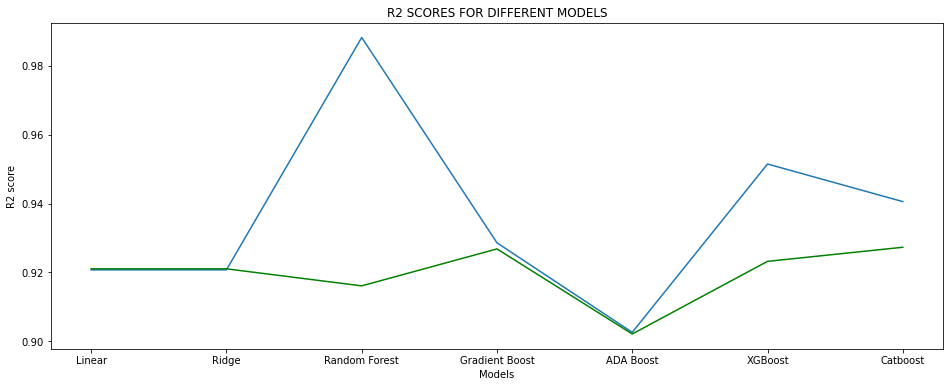

In [60]:
plt.figure(figsize=(16,6))
plt.plot(models,R2_Train)
plt.plot(models,R2_Test,color='green')
plt.xlabel("Models")
plt.ylabel("R2 score")
plt.title("R2 SCORES FOR DIFFERENT MODELS")
plt.show()

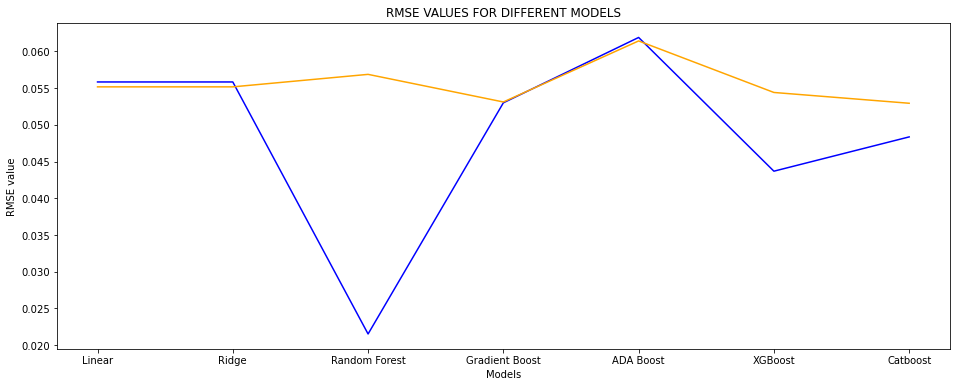

In [61]:
plt.figure(figsize=(16,6))
plt.plot(models,RMSE_Train,color='blue')
plt.plot(models,RMSE_Test,color='orange')
plt.xlabel("Models")
plt.ylabel("RMSE value")
plt.title("RMSE VALUES FOR DIFFERENT MODELS")
plt.show()

#### LOOKING AT THE ABOVE GRAPHS WE CONCLUDE THAT CATBOOST IS THE BEST FIT MODEL 

## SAVING THE MODEL USING PICKLE FUNCTION  

In [62]:
# PREDICTING VALUE OF 
prediction = cat_model.predict(X_train.head(1))
print(prediction*100)

print(y_train.head(1)*100)

[40.97534221]
       Burn Rate
18374       45.0


In [63]:
# IMPORTING PICKLE
import pickle

# SAVING MODEL 
with open('cat_model_pickle','wb') as f:
    pickle.dump(cat_model,f)
    
# LOADING MODEL    
with open('cat_model_pickle','rb') as f:
    cat_model=pickle.load(f)

In [64]:
prediction_2 = cat_model.predict(X_train.head(1))
print(prediction_2*100)

print(y_train.head(1)*100)

[40.97534221]
       Burn Rate
18374       45.0
